<a href="https://colab.research.google.com/github/Gameto2025/Churn_Banco/blob/main/Banco_Churn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING PARA BANCO**

## **Extraccion y Visualizacion de los datos**

In [22]:
import warnings

warnings.filterwarnings('ignore')


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import os
try:
    from sklearn2pmml import sklearn2pmml
except ImportError:
    !pip install sklearn2pmml
    from sklearn2pmml import sklearn2pmml

In [25]:
datos= pd.read_csv('Banco_Churn.csv')
datos

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **Calculo de Clases**

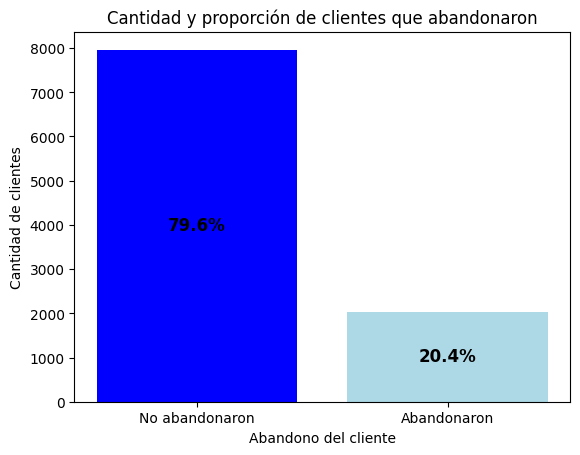

In [26]:

churn_counts = datos['Churn'].value_counts()
churn_percentages = datos['Churn'].value_counts(normalize=True) * 100

labels = ['No abandonaron', 'Abandonaron']
counts = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
percentages = [churn_percentages.get(0, 0), churn_percentages.get(1, 0)]

fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['blue', 'lightblue'])
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'{percent:.1f}%',
        ha='center', va='center', color='black', fontsize=12, fontweight='bold'
    )
ax.set_title('Cantidad y proporción de clientes que abandonaron')
ax.set_ylabel('Cantidad de clientes')
ax.set_xlabel('Abandono del cliente')

plt.show()

En este dataframe existe un desbalance de clases.

## **PREPARACION DE LOS DATOS PARA EL MODELADO**


#### **APLICANDO FEATURE ENGINEERING**

**Removiendo columnas**

In [27]:
df= datos.drop(columns=['RowNumber','Tenure', 'CustomerId', 'HasCrCard','EstimatedSalary','Surname'])
df


,CreditScore,Country,Gender,Age,Balance,NumOfProducts,IsActiveMember,Churn
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,2,0,0
9996,516,France,Male,35,57369.61,1,1,0
9997,709,France,Female,36,0.00,1,1,1
9998,772,Germany,Male,42,75075.31,2,0,1



### **Creando variables**

In [28]:
df['Balance_zero'] = (datos['Balance'] == 0).astype(int)

df['Mujer_Alemania'] = ((df['Gender'] == 'Female') & (df['Country'] == 'Germany')).astype(int)

df['Inactivo_40_70'] = ((df['Age'] >= 40) & (df['Age'] <= 70) & (df['IsActiveMember'] == 0)).astype(int)

df['Products_Risk_Flag'] = (df['NumOfProducts'] >= 3).astype(int)

df['Country_Risk_Flag'] = (df['Country'] == 'Germany').astype(int)

df['Age_Risk'] = ((df['Age'] >= 40) & (df['Age'] <= 70)).astype(int)

### **Transformando columnas categoricas a numericas**

In [29]:
df['Country'] = df['Country'].map({
    'Spain': 1,
    'France': 2,
    'Germany': 3
})

In [30]:
df['Gender'] = df['Gender'].map({
    'Female': 1,
    'Male': 2
})

In [31]:
df.head(5)

,CreditScore,Country,Gender,Age,Balance,NumOfProducts,IsActiveMember,Churn,Balance_zero,Mujer_Alemania,Inactivo_40_70,Products_Risk_Flag,Country_Risk_Flag,Age_Risk
0,619,2,1,42,0.00,1,1,1,1,0,0,0,0,1
1,608,1,1,41,83807.86,1,1,0,0,0,0,0,0,1
2,502,2,1,42,159660.80,3,0,1,0,0,1,1,0,1
3,699,2,1,39,0.00,2,0,0,1,0,0,0,0,0
4,850,1,1,43,125510.82,1,1,0,0,0,0,0,0,1


### **Usando  mutual_info_classif (Información Mutua)**

In [32]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df.drop(columns=['Churn'])
y = df['Churn']

importancias = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_scores = pd.DataFrame({'Variable': X.columns, 'Importancia_MI': importancias})
mi_scores = mi_scores.sort_values(by='Importancia_MI', ascending=False)
print(mi_scores)

              Variable  Importancia_MI
3                  Age        0.071408
5        NumOfProducts        0.068776
12            Age_Risk        0.059971
9       Inactivo_40_70        0.051771
10  Products_Risk_Flag        0.035149
11   Country_Risk_Flag        0.018966
8       Mujer_Alemania        0.017270
1              Country        0.014730
6       IsActiveMember        0.011607
2               Gender        0.011242
4              Balance        0.009895
0          CreditScore        0.009439
7         Balance_zero        0.009418


Se eliminaran las variables que tengan menor indice MI, ya son las que menos aportan en el analisis del churn.

In [33]:
df_final = df.drop(columns=['Age','CreditScore','Balance_zero','Balance','Gender','IsActiveMember','Mujer_Alemania','Country'])
df_final.sample(10)

,NumOfProducts,Churn,Inactivo_40_70,Products_Risk_Flag,Country_Risk_Flag,Age_Risk
2185,1,0,0,0,0,1
79,2,0,1,0,1,1
1428,1,0,0,0,0,1
9347,1,0,0,0,0,0
1991,2,0,0,0,1,0
8840,2,0,0,0,0,0
761,1,1,0,0,0,0
4233,2,0,0,0,0,0
1887,1,0,0,0,0,0
4596,2,0,0,0,0,0


### **Verificando Correlacion entre variables**

In [34]:
df_final.corr().round(4)

,NumOfProducts,Churn,Inactivo_40_70,Products_Risk_Flag,Country_Risk_Flag,Age_Risk
NumOfProducts,1.0000,-0.0478,-0.0297,0.5220,-0.0104,-0.0286
Churn,-0.0478,1.0000,0.3456,0.2986,0.1735,0.3254
Inactivo_40_70,-0.0297,0.3456,1.0000,0.0926,0.0718,0.6019
Products_Risk_Flag,0.5220,0.2986,0.0926,1.0000,0.0496,0.1000
Country_Risk_Flag,-0.0104,0.1735,0.0718,0.0496,1.0000,0.0632
Age_Risk,-0.0286,0.3254,0.6019,0.1000,0.0632,1.0000


Todas las variables elegidas tiene una correlacion moderada que no representan fuga de datos.


####**Aplicando indice VIF para ver si hay colinealidad entre variables**

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = df_final.drop(columns=['Churn'])
X_const = add_constant(X_vif)

vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

             Variable        VIF
0               const  11.432094
1       NumOfProducts   1.391523
2      Inactivo_40_70   1.576249
3  Products_Risk_Flag   1.408808
4   Country_Risk_Flag   1.008865
5            Age_Risk   1.577766


Si el valor es menor a 5 no hay problemas de multicolinealidad. En consecuncia, las variables elegidas no tienen multicolinealidad.

#### **Verificando fuga de datos con Correlacion Pearson**

In [36]:
corr_target = df_final.corr()['Churn'].sort_values(ascending=False)
print(corr_target)

Churn                 1.000000
Inactivo_40_70        0.345597
Age_Risk              0.325412
Products_Risk_Flag    0.298637
Country_Risk_Flag     0.173488
NumOfProducts        -0.047820
Name: Churn, dtype: float64


En general, ninguna variable tiene alta correlacion (sobre 0.5) con la variable en estudio. Por lo tanto, se podria concluir que no hay fuga de datos.

## **Dataframe final para el modelado**

In [37]:
df_final.sample(5)

,NumOfProducts,Churn,Inactivo_40_70,Products_Risk_Flag,Country_Risk_Flag,Age_Risk
1463,1,0,0,0,0,0
4262,2,0,0,0,0,1
3430,2,0,0,0,0,0
246,2,0,0,0,1,0
6811,2,0,1,0,0,1


In [38]:
for col in df_final.columns:
    print(f"\nValores únicos en '{col}':")
    print(df_final[col].unique())



Valores únicos en 'NumOfProducts':
[1 3 2 4]

Valores únicos en 'Churn':
[1 0]

Valores únicos en 'Inactivo_40_70':
[0 1]

Valores únicos en 'Products_Risk_Flag':
[0 1]

Valores únicos en 'Country_Risk_Flag':
[0 1]

Valores únicos en 'Age_Risk':
[1 0]


## **CREANDO BASELINE CON MODELO DUMMY**


In [39]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df_final.drop(['Churn'],axis=1)
y = df_final['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

dummy_clf = DummyClassifier(strategy='constant', constant=1, random_state=42)
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud (accuracy) del DummyClassifier: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Exactitud (accuracy) del DummyClassifier: 0.1947
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2416
           1       0.19      1.00      0.33       584

    accuracy                           0.19      3000
   macro avg       0.10      0.50      0.16      3000
weighted avg       0.04      0.19      0.06      3000



# **MODELO XGBOOST**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

Matriz de confusión:
[[1448  145]
 [ 175  232]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.62      0.57      0.59       407

    accuracy                           0.84      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000

AUC: 0.822


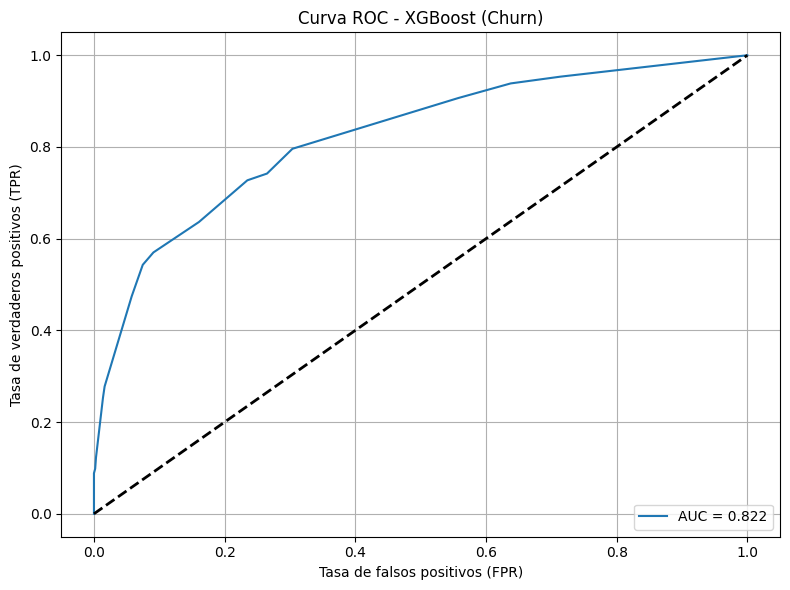

In [41]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

columnas_numericas = [
    'Age_Risk',
    'NumOfProducts',
    'Inactivo_40_70',
    'Products_Risk_Flag',
    'Country_Risk_Flag'
]

# -----------------------------
# Train / Test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# -----------------------------
# Preprocesamiento
# -----------------------------
preprocesador = ColumnTransformer(transformers=[
    ('num', 'passthrough', columnas_numericas)
])

# -----------------------------
# XGBoost
# -----------------------------
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# Pipeline
# -----------------------------
pipe_xgb = Pipeline(steps=[
    ('preprocesador', preprocesador),
    ('clasificador', XGBClassifier(
        n_estimators=400,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        eval_metric='auc',
        random_state=42,
        n_jobs=-1
    ))
])

# -----------------------------
# Entrenamiento
# -----------------------------
pipe_xgb.fit(X_train, y_train)

# -----------------------------
# Predicciones
# -----------------------------
y_prob = pipe_xgb.predict_proba(X_test)[:, 1]

umbral = 0.58  # mejor umbral
y_pred = (y_prob >= umbral).astype(int)

# -----------------------------
# Evaluación
# -----------------------------
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"AUC: {roc_auc_score(y_test, y_prob):.3f}")

# -----------------------------
# Curva ROC
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - XGBoost (Churn)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## **EVALUACION DEL MODELO CON VARIOS CLIENTES NUEVOS**

In [ ]:
import pandas as pd

# -----------------------------
# Columnas del modelo (orden correcto)
# -----------------------------
columnas_modelo = [
    'Age_Risk',
    'NumOfProducts',
    'Inactivo_40_70',
    'Products_Risk_Flag',
    'Country_Risk_Flag'
]

# Mapeo de países a riesgo
paises_riesgo = {
    0: 0,  # France
    1: 1,  # Germany
    2: 0   # Spain
}

# -----------------------------
# Función para ingresar clientes
# -----------------------------
def ingresar_cliente(n_cliente):
    print(f"\n--- Cliente {n_cliente} ---")

    age = int(input("Edad del cliente: "))
    num_products = int(input("Número de productos contratados: "))

    cuenta_activa = int(input("¿La cuenta está ACTIVA actualmente? (1=Sí, 0=No): "))

    # 🔹 Age_Risk: solo edad
    age_risk = int((age >= 40) and (age <= 70))

    # 🔹 Inactivo_40_70: edad + inactividad
    inactivo_40_70 = int((age >= 40) and (age <= 70) and (cuenta_activa == 0))

    # Riesgo por exceso de productos
    products_risk = int(num_products >= 3)

    print("País:")
    print("0 = France")
    print("1 = Germany")
    print("2 = Spain")
    pais = int(input("Seleccione país: "))
    country_risk = paises_riesgo.get(pais, 0)

    return {
        'Age_Risk': age_risk,
        'NumOfProducts': num_products,
        'Inactivo_40_70': inactivo_40_70,
        'Products_Risk_Flag': products_risk,
        'Country_Risk_Flag': country_risk
    }
# -----------------------------
# Ingreso de múltiples clientes
# -----------------------------
clientes = []
contador = 1

while True:
    clientes.append(ingresar_cliente(contador))
    contador += 1

    continuar = input("\n¿Deseas ingresar otro cliente? (s/n): ").lower()
    if continuar != 's':
        break

# -----------------------------
# DataFrame final
# -----------------------------
clientes_df = pd.DataFrame(clientes)[columnas_modelo]

# -----------------------------
# Predicción con XGBoost
# -----------------------------
probabilidades = pipe_xgb.predict_proba(clientes_df)[:, 1]

umbral_optimo = 0.58  # umbral validado
clientes_df['Prob_Abandono'] = probabilidades
clientes_df['Abandona'] = (probabilidades >= umbral_optimo).astype(int)

# -----------------------------
# Etiquetas claras para interpretación
# -----------------------------
def nivel_riesgo(p):
    if p >= 0.75:
        return 'ALTO'
    elif p >= 0.58:
        return 'MEDIO'
    else:
        return 'BAJO'

clientes_df['Nivel_Riesgo'] = clientes_df['Prob_Abandono'].apply(nivel_riesgo)
clientes_df['Decision'] = clientes_df['Abandona'].map({
    1: 'Abandona',
    0: 'No abandona'
})

# -----------------------------
# Resultados claros
# -----------------------------
print("\n===== RESULTADOS DE PREDICCIÓN =====\n")

for i, fila in clientes_df.iterrows():
    print(
        f"Cliente {i+1}: "
        f"Probabilidad = {fila['Prob_Abandono']:.2%} | "
        f"Riesgo = {fila['Nivel_Riesgo']} | "
        f"Decisión = {fila['Decision']}"
    )

print("\n===== RESUMEN GENERAL =====")
print(clientes_df['Decision'].value_counts())

NameError: name 'pipe_xgb' is not defined

##**GUARDAR EL MODELO ENTRENADO COMO PKL**

In [ ]:
import joblib

joblib.dump(pipe_xgb, 'modelo_Banco_churn.pkl')

['modelo_Banco_churn.pkl']

In [ ]:
!pip install sklearn2pmml

In [ ]:
# Instalación: pip install sklearn2pmml
from sklearn2pmml import sklearn2pmml, PMMLPipeline
from xgboost import XGBClassifier

## **Convirtiendo modelo a PMML para ser leido por Java**

In [ ]:
from sklearn2pmml import sklearn2pmml, PMMLPipeline

pmml_pipe = PMMLPipeline([
    ("preprocesador", pipe_xgb.named_steps['preprocesador']),
    ("clasificador", pipe_xgb.named_steps['clasificador'])
])

# 2. Exportar a archivo .pmml
try:
    sklearn2pmml(pmml_pipe, "modelo_churn_banco.pmml", with_repr=True)
    print("Archivo 'modelo_churn_banco.pmml' creado con éxito.")
except Exception as e:
    print("Error: Asegúrate de tener instalado Java en tu entorno de Python (necesario para sklearn2pmml).")
    print(f"Detalle: {e}")

Archivo 'modelo_churn_banco.pmml' creado con éxito.
